In [94]:
# libraries 

import random
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import cv2

import tensorflow as tf
import keras
from keras.layers import Conv2D, Dropout, Flatten, Dense
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns 

import pandas as pd 
import numpy as np


In [95]:
# # train_dir = '/Users/sudeshgurung/Msc-Data_Analytics/dissertation/Project/dataset/finalized_aptos/train/'
# val_dir = '/Users/sudeshgurung/Msc-Data_Analytics/dissertation/Project/dataset/finalized_aptos/val/'
# test_dir = '/Users/sudeshgurung/Msc-Data_Analytics/dissertation/Project/dataset/finalized_aptos/test/'

In [96]:
# ## Using undersampled training set
# train_dir = '/Users/sudeshgurung/Msc-Data_Analytics/dissertation/Project/dataset/under_sampled_aptos/train/'

In [97]:
train_dir = '/Users/sudeshgurung/Msc-Data_Analytics/dissertation/Project/dataset/cropped_aptos/train'
val_dir = '/Users/sudeshgurung/Msc-Data_Analytics/dissertation/Project/dataset/cropped_aptos/val'
test_dir ='/Users/sudeshgurung/Msc-Data_Analytics/dissertation/Project/dataset/cropped_aptos/test'


## Variables


In [98]:
IMAGE_SIZE = 256
EPOCH = 30

# Image Pre-processing 

In [99]:
def custom_preprocessing(image):
    return cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , 5) ,-4 ,128)
    
    

In [100]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function = custom_preprocessing
)

In [101]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
#     color_mode='grayscale',
    batch_size=32,
    class_mode='sparse',
    shuffle=True,
    seed=24,
)

Found 2930 images belonging to 5 classes.


In [102]:
class_labels = list(train_generator.class_indices.keys())
class_labels

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


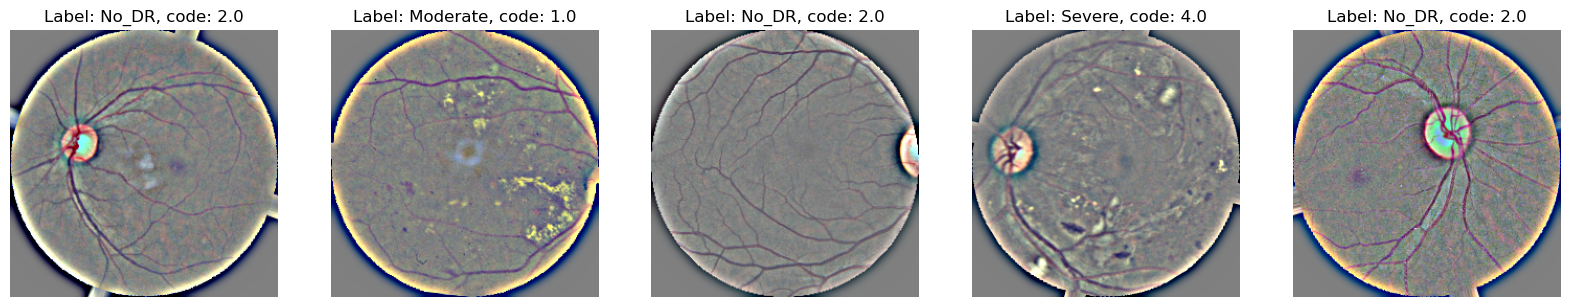

In [103]:

# Get the next batch of images and labels from the generator
images, labels = train_generator.next()

# Display the first 5 images from the batch
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.set_title('Label: {}'.format(class_labels[int(labels[i])])+', code: {}'.format(labels[i]))
    ax.axis('off')

plt.show()

In [104]:
# for validation 
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function = custom_preprocessing
)

In [105]:
validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
    shuffle=True,
    seed=24,
#     color_mode='grayscale',
)

Found 366 images belonging to 5 classes.


In [106]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function = custom_preprocessing
)

In [107]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
    shuffle=False,
#     seed=24,
#     color_mode='grayscale',
)

Found 366 images belonging to 5 classes.


In [108]:
class_labels_test_data = list(test_generator.class_indices.keys())
class_labels_test_data

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

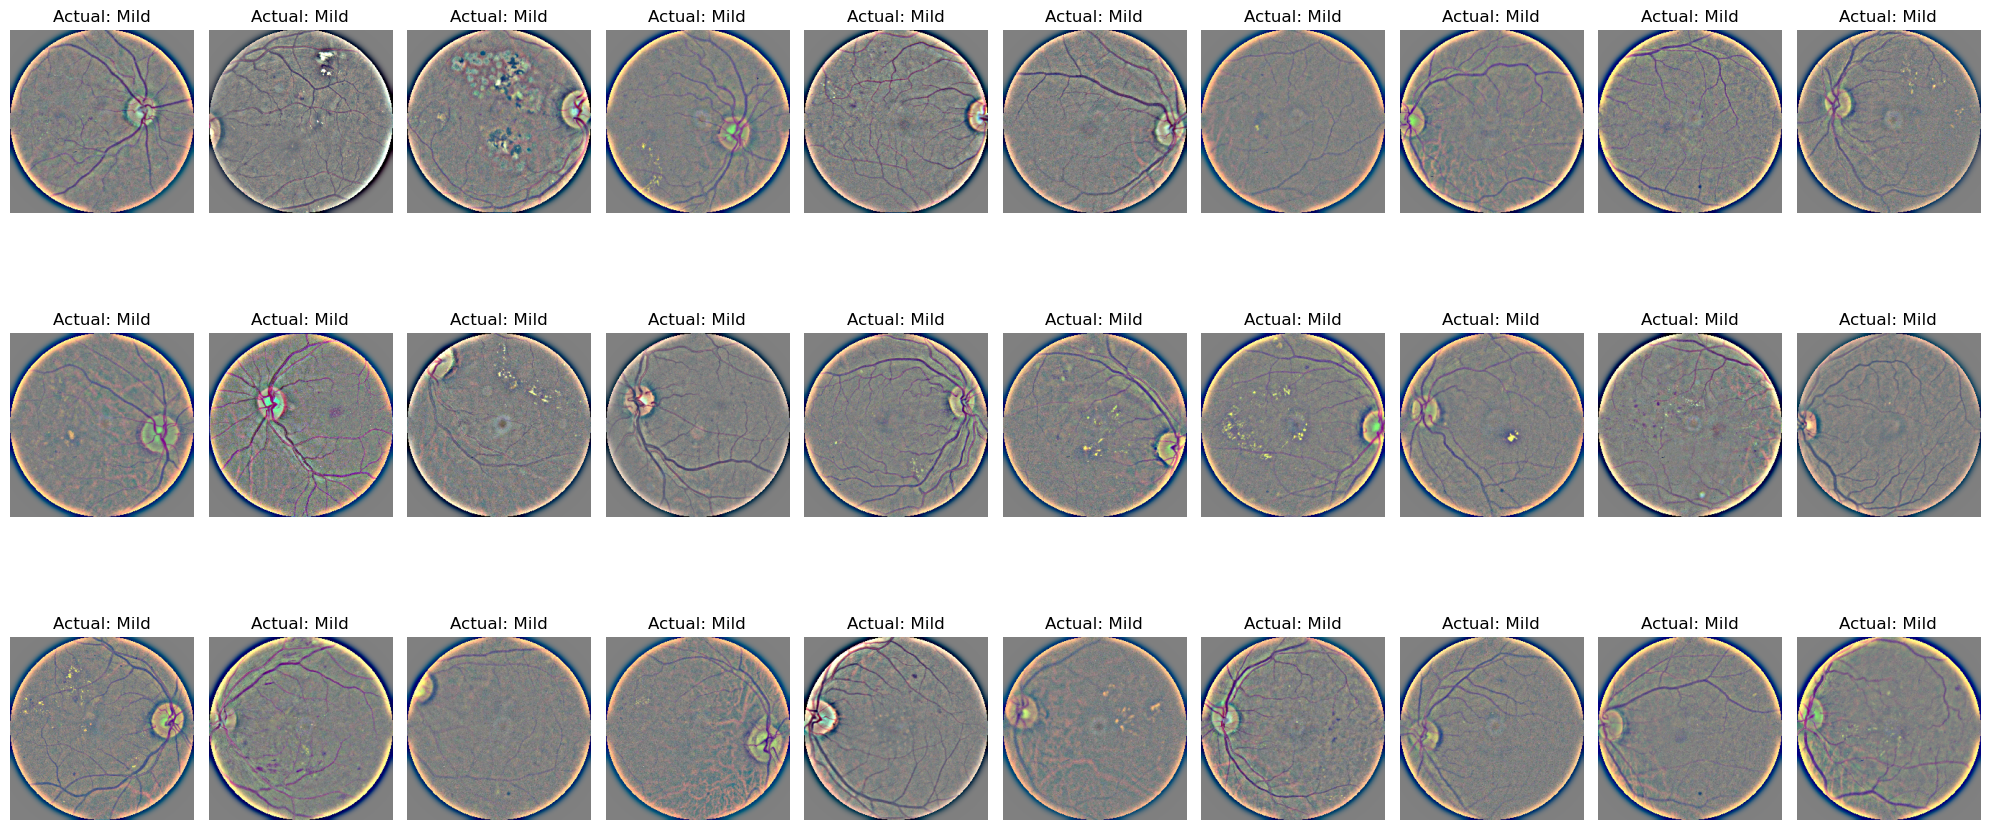

In [109]:
images, labels = test_generator.next()

# Display the first 30 images from the batch
fig, axes = plt.subplots(nrows=3, ncols=10, figsize=(20, 10))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i])
    ax.set_title('Actual: {}'.format(class_labels_test_data[int(labels[i])]))
    ax.axis('off')

plt.tight_layout()
plt.show()

# Model creation

In [110]:
InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))



In [111]:
for layer in InceptionV3_model.layers:
    layer.trainable = False

In [112]:
model = Sequential()
model.add(InceptionV3_model)
# model.add(Dropout(0.25))
model.add(Flatten()),
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [113]:
# model = keras.Sequential([
#     keras.layers.Conv2D(32, 3, input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3), activation='relu'),
#     keras.layers.MaxPooling2D(),
    
#     keras.layers.Conv2D(64, 3, activation='relu'),
#     keras.layers.MaxPooling2D(),

    
# #     keras.layers.Conv2D(128, 3, activation='relu'),
# #     keras.layers.MaxPooling2D(),
    
#     keras.layers.Conv2D(256, 3, activation='relu'),
#     keras.layers.MaxPooling2D(),
    
# #     keras.layers.Conv2D(512, 3, activation='relu'),
# #     keras.layers.MaxPooling2D(),
    
#     keras.layers.Dropout(0.25),
    
#     keras.layers.Flatten(),
#     keras.layers.Dropout(0.25),
    
# #     keras.layers.Dense(1024, activation='relu'),

    
#     keras.layers.Dense(512, activation='relu'),
    
        
#     keras.layers.Dense(256, activation='relu'),

    
#     keras.layers.Dense(5, activation='softmax')
    
# ])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [114]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 73728)             0         
                                                                 
 dense_7 (Dense)             (None, 512)               37749248  
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)              

In [115]:
from keras.callbacks import ReduceLROnPlateau

In [116]:
# hyper-parameters
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0)
# checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [117]:
h = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=EPOCH,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // validation_generator.batch_size,
    callbacks=[reduce_lr,early_stopping],

)

Epoch 1/30
91/91 [==============================] - 1247s 13s/step - loss: 4.2719 - accuracy: 0.5276 - val_loss: 0.9008 - val_accuracy: 0.6278 - lr: 0.0010
Epoch 2/30
91/91 [==============================] - 1614s 18s/step - loss: 1.0422 - accuracy: 0.6384 - val_loss: 0.8699 - val_accuracy: 0.6847 - lr: 0.0010
Epoch 3/30
91/91 [==============================] - 2134s 23s/step - loss: 0.9011 - accuracy: 0.6822 - val_loss: 0.8487 - val_accuracy: 0.6960 - lr: 0.0010
Epoch 4/30
91/91 [==============================] - 1890s 21s/step - loss: 0.8996 - accuracy: 0.6863 - val_loss: 0.7918 - val_accuracy: 0.7045 - lr: 0.0010
Epoch 5/30
91/91 [==============================] - 1773s 19s/step - loss: 0.8702 - accuracy: 0.6936 - val_loss: 0.7696 - val_accuracy: 0.7074 - lr: 0.0010
Epoch 6/30
91/91 [==============================] - 1753s 19s/step - loss: 0.8843 - accuracy: 0.6974 - val_loss: 0.8056 - val_accuracy: 0.7017 - lr: 0.0010
Epoch 7/30
91/91 [==============================] - 1827s 20s/st

In [118]:
def visualize_performance(history):
    #Visualizing the training performance
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='val_Loss')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')

    plt.title('Loss evolution')

    plt.subplot(2, 2, 2)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy evolution')

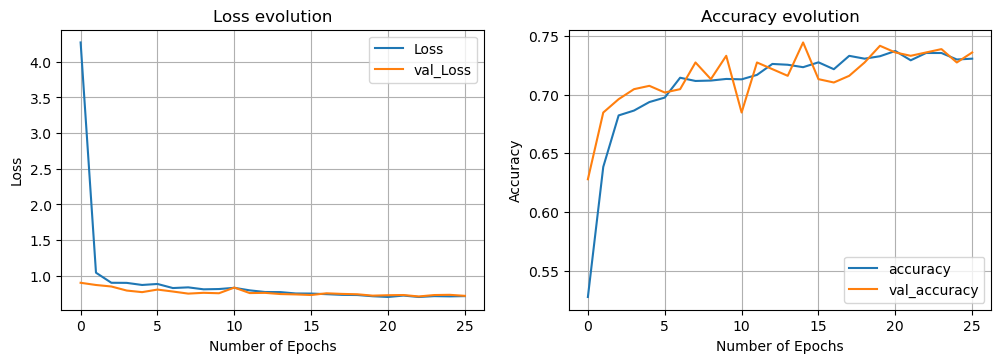

In [120]:
visualize_performance(h)

In [122]:
model.evaluate(test_generator)

12/12 [==============================] - 50s 4s/step - loss: 0.6641 - accuracy: 0.7514


[0.6640971302986145, 0.751366138458252]

In [124]:
predictions = model.predict(test_generator, steps=test_generator.samples/test_generator.batch_size)
predictions

11/11 [==============================] - 51s 4s/step


array([[0.21436785, 0.17892173, 0.54759395, 0.03526627, 0.02385011],
       [0.07506918, 0.40787116, 0.04691974, 0.23637426, 0.23376563],
       [0.01034925, 0.46545982, 0.00112103, 0.2547764 , 0.26829347],
       ...,
       [0.03908952, 0.48344883, 0.00706273, 0.25064272, 0.21975626],
       [0.13790698, 0.5429887 , 0.02529181, 0.17839184, 0.11542056],
       [0.17276552, 0.57499397, 0.02626245, 0.14542544, 0.08055262]],
      dtype=float32)

In [126]:
predicted_classes = [np.argmax(pred) for pred in predictions]
predicted_classes[:30]

[2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1]

In [128]:
true_classes = test_generator.classes
true_classes[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [130]:
class_labels_test_data = list(test_generator.class_indices.keys())
class_labels_test_data

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

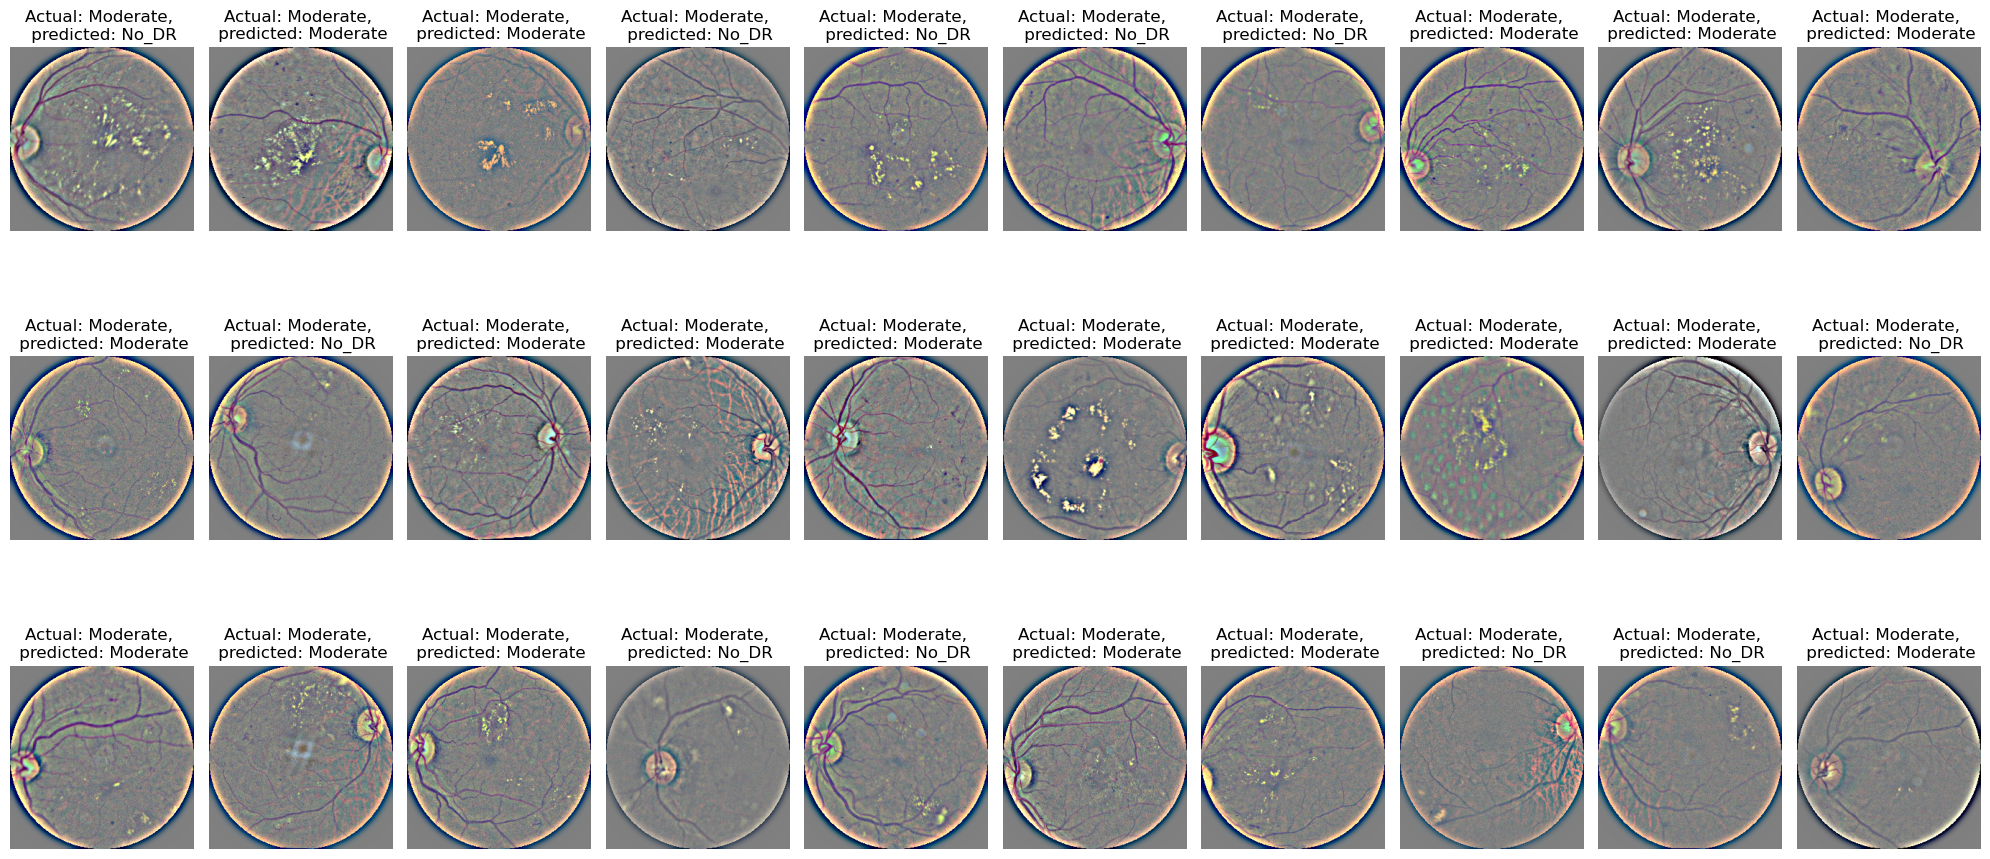

In [132]:
# Get the next batch of images and labels from the generator
images, labels = test_generator.next()

# Display the first 30 images from the batch
fig, axes = plt.subplots(nrows=3, ncols=10, figsize=(20, 10))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i])
    ax.set_title('Actual: {}'.format(class_labels_test_data[int(labels[i])])+', \n predicted: {}'.format(class_labels_test_data[predicted_classes[i]]))
    ax.axis('off')

plt.tight_layout()
plt.show()

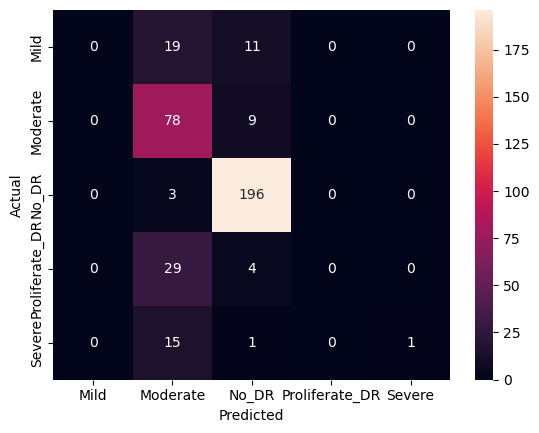

In [134]:
cm = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels_test_data, yticklabels= class_labels_test_data)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [136]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels_test_data)
print(report) 

                precision    recall  f1-score   support

          Mild       0.00      0.00      0.00        30
      Moderate       0.54      0.90      0.68        87
         No_DR       0.89      0.98      0.93       199
Proliferate_DR       0.00      0.00      0.00        33
        Severe       1.00      0.06      0.11        17

      accuracy                           0.75       366
     macro avg       0.49      0.39      0.34       366
  weighted avg       0.66      0.75      0.67       366



/Users/sudeshgurung/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sudeshgurung/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sudeshgurung/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

num_classes = 3 

predicted_probs = np.zeros((len(predicted_classes), num_classes))
predicted_probs[np.arange(len(predicted_classes)), predicted_classes] = 1

# Binarize the true_labels (convert them to one-hot encoded format)
true_labels_bin = label_binarize(true_classes, classes=np.arange(num_classes))


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:,i], predicted_probs[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve class {i}:{class_labels_test_data[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for DR Stages Classification')
plt.legend(loc="lower right")
plt.show()



NameError: name 'predicted_classes' is not defined